In [2]:
# Para mostrar plotly en notebook
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px
import pandas as pd
import numpy as np


In [4]:
fuga = pd.read_csv(r'/Users/gnerojas/Documents/Master/Minería de datos y modelización predictiva /Tarea_Minería_2024_25_Gr1/FugaClientes_Training copia.csv')
fuga.nunique()

ID                 6353
Genero                2
Mayor65               2
Conyuge               2
PersCargo             2
Antig.fc.edad        73
Telf_serv             2
VariasLineas          2
Int_serv              3
Seguridad             2
CopiaSeguridad        2
Antivirus_disp        2
Soporte_tecnico       2
TV_streaming          2
Peliculas             2
Contrato              3
Fact_sinPapel         2
MetodoPago            4
FacturaMes         1522
FacturaTotal       5923
Fuga                  2
dtype: int64

In [6]:
fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6353 non-null   object 
 1   Genero           6001 non-null   object 
 2   Mayor65          6001 non-null   float64
 3   Conyuge          6353 non-null   object 
 4   PersCargo        6353 non-null   object 
 5   Antig.fc.edad    5959 non-null   float64
 6   Telf_serv        6261 non-null   object 
 7   VariasLineas     6353 non-null   object 
 8   Int_serv         6163 non-null   object 
 9   Seguridad        6353 non-null   object 
 10  CopiaSeguridad   6353 non-null   object 
 11  Antivirus_disp   6353 non-null   object 
 12  Soporte_tecnico  6353 non-null   object 
 13  TV_streaming     6353 non-null   object 
 14  Peliculas        6353 non-null   object 
 15  Contrato         5959 non-null   object 
 16  Fact_sinPapel    6092 non-null   object 
 17  MetodoPago    

In [8]:
fuga.head(10)

ID  Genero  Mayor65 Conyuge PersCargo  Antig.fc.edad Telf_serv  \
0  7590-VHVEG  Female      0.0     Yes        No            1.0        No   
1  5575-GNVDE    Male      0.0      No        No           34.0       Yes   
2  3668-QPYBK    Male      0.0      No        No            2.0       Yes   
3  7795-CFOCW     NaN      0.0      No        No           45.0        No   
4  9237-HQITU  Female      0.0      No        No            NaN       Yes   
5  9305-CDSKC  Female      0.0      No        No            8.0       Yes   
6  1452-KIOVK    Male      0.0      No       Yes           22.0       Yes   
7  6713-OKOMC  Female      0.0      No        No           10.0        No   
8  7892-POOKP     NaN      0.0     Yes        No           28.0       Yes   
9  6388-TABGU    Male      0.0      No       Yes           62.0       Yes   

  VariasLineas     Int_serv Seguridad  ... Antivirus_disp Soporte_tecnico  \
0           No          DSL        No  ...             No              No   
1           No          DSL       Yes  ...            Yes              No   
2           No          DSL       Yes  ...             No              No   
3           No          DSL       Yes  ...            Yes             Yes   
4           No  Fiber optic        No  ...             No              No   
5          Yes  Fiber optic        No  ...            Yes              No   
6          Yes  Fiber optic        No  ...             No              No   
7           No          NaN       Yes  ...             No              No   
8          Yes  Fiber optic        No  ...            Yes             Yes   
9           No          DSL       Yes  ...             No              No   

  TV_streaming Peliculas        Contrato Fact_sinPapel  \
0           No        No  Month-to-month           Yes   
1           No        No        One year            No   
2           No        No  Month-to-month           Yes   
3           No        No        One year            No   
4           No        No  Month-to-month           Yes   
5          Yes       Yes  Month-to-month           Yes   
6          Yes        No  Month-to-month           Yes   
7           No        No  Month-to-month            No   
8          Yes       Yes  Month-to-month           Yes   
9           No        No             NaN            No   

                MetodoPago FacturaMes  FacturaTotal  Fuga  
0                      NaN        NaN         29.85     0  
1             Mailed check        NaN       1889.50     0  
2             Mailed check      53.85        108.15     1  
3                      NaN      42.30       1840.75     0  
4         Electronic check      70.70        151.65     1  
5                      NaN      99.65        820.50     1  
6  Credit card (automatic)        NaN       1949.40     0  
7             Mailed check      29.75        301.90     0  
8         Electronic check     104.80       3046.05     1  
9                      NaN      56.15       3487.95     0  

[10 rows x 21 columns]

In [10]:
fuga.MetodoPago.value_counts()

MetodoPago
Electronic check             1972
Mailed check                 1336
Credit card (automatic)      1290
Bank transfer (automatic)    1283
Name: count, dtype: int64

In [12]:
#Pasar datos que contengan valores < 10 : tipo categórico
to_cat = list(fuga.loc[:,fuga.nunique() <= 10]); 

# Podemos cambiar el tipo de todas ellas a factor de una vez
fuga[to_cat] = fuga[to_cat].astype('category')

fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               6353 non-null   object  
 1   Genero           6001 non-null   category
 2   Mayor65          6001 non-null   category
 3   Conyuge          6353 non-null   category
 4   PersCargo        6353 non-null   category
 5   Antig.fc.edad    5959 non-null   float64 
 6   Telf_serv        6261 non-null   category
 7   VariasLineas     6353 non-null   category
 8   Int_serv         6163 non-null   category
 9   Seguridad        6353 non-null   category
 10  CopiaSeguridad   6353 non-null   category
 11  Antivirus_disp   6353 non-null   category
 12  Soporte_tecnico  6353 non-null   category
 13  TV_streaming     6353 non-null   category
 14  Peliculas        6353 non-null   category
 15  Contrato         5959 non-null   category
 16  Fact_sinPapel    6092 non-null   category


In [14]:
#Eliminar columna ID porque no proporciona nada interesante para el analisis

fuga = fuga.drop('ID', axis=1)


In [16]:
#Cambio de nombre de columnas que no estan claras
fuga.rename(columns={'Antig.fc.edad':'Antiguedad'}, inplace=True)

In [18]:
#descripcion general de variables numericas
fuga.describe()

Antiguedad   FacturaMes  FacturaTotal
count  5959.000000  5959.000000   6342.000000
mean     32.380769    64.678369   2268.727152
std      24.540411    30.013422   2258.843022
min       0.000000    18.250000     18.800000
25%       9.000000    35.550000    394.475000
50%      29.000000    70.300000   1384.175000
75%      55.000000    89.800000   3781.512500
max      72.000000   118.750000   8672.450000

In [20]:
#determinar si la sta es alta o baja respecto a la media

f=fuga.FacturaMes
a=fuga.FacturaTotal
c=fuga.Antiguedad

q=f.std()/f.mean()*100
w=a.std()/a.mean()*100
r=c.std()/c.mean()*100
r

#variabilidad alta en los datos de las tres variables numericas

75.7869950120962

In [22]:
#descriptivo de variables categóricas
fuga.describe(exclude=np.number)

Genero  Mayor65 Conyuge PersCargo Telf_serv VariasLineas     Int_serv  \
count    6001   6001.0    6353      6353      6261         6353         6163   
unique      2      2.0       2         2         2            2            3   
top      Male      0.0      No        No       Yes           No  Fiber optic   
freq     3038   5045.0    3287      4439      5656         3687         2702   

       Seguridad CopiaSeguridad Antivirus_disp Soporte_tecnico TV_streaming  \
count       6353           6353           6353            6353         6353   
unique         2              2              2               2            2   
top           No             No             No              No           No   
freq        4532           4180           4180            4509         3936   

       Peliculas        Contrato Fact_sinPapel        MetodoPago  Fuga  
count       6353            5959          6092              5881  6353  
unique         2               3             2                 4     2  
top           No  Month-to-month           Yes  Electronic check     0  
freq        3902            3285          3609              1972  4667

In [24]:
#para ver histogramas : distribución de los datos

import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,8), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # Mostrar gráfico
    plt.show()

def cat_plot(col):
     if col.dtypes == 'category':
        #fig = px.bar(col.value_counts())
        plt.figure(figsize=(8, 5))  # Crear una nueva figura
        sns.countplot(x=col)
        plt.title(f"Distribución de {col.name}")
        plt.xlabel(col.name)
        plt.ylabel("Frecuencia")
        plt.show()  # Mostrar el gráfico
        plt.close() 

def plot(col):
     if col.dtypes != 'category':
        print('Cont')
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        print('Cat')
        cat_plot(col)#.show()


Cat


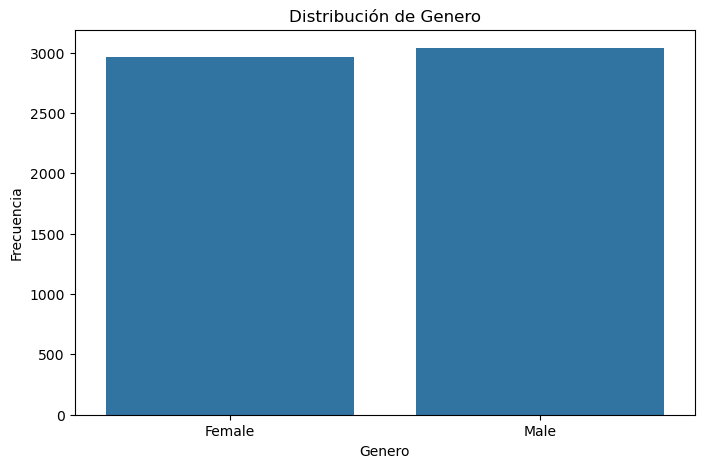

Cat


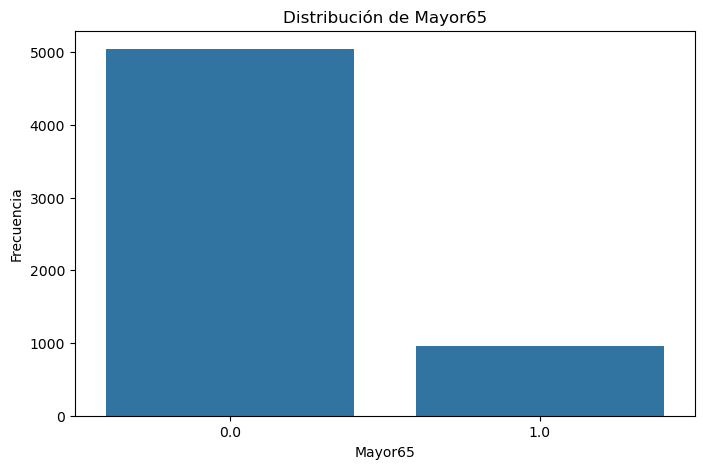

Cat


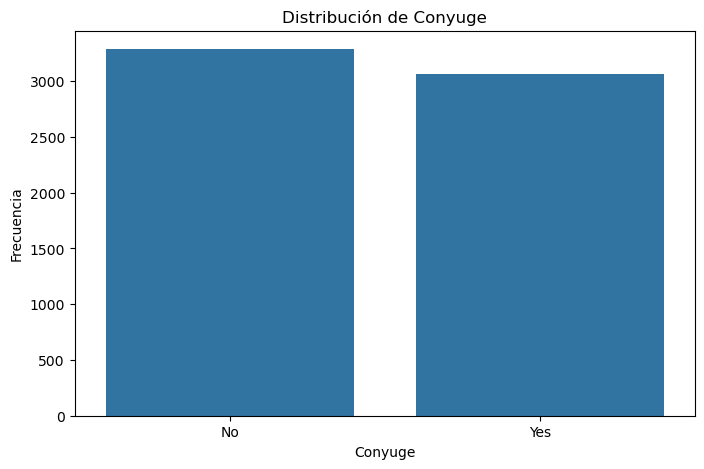

Cat


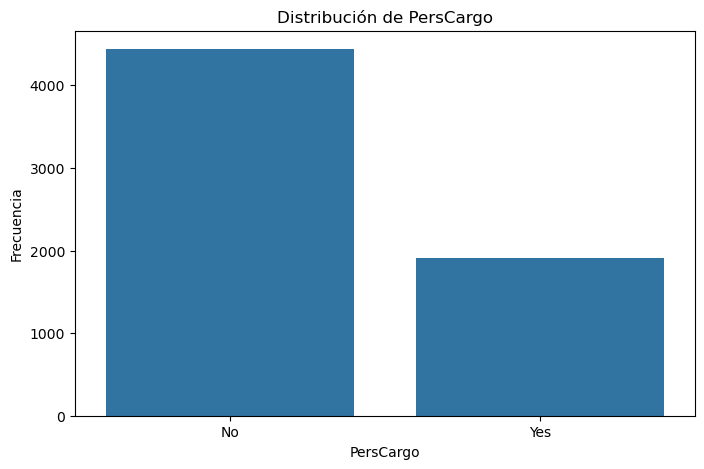

Cont


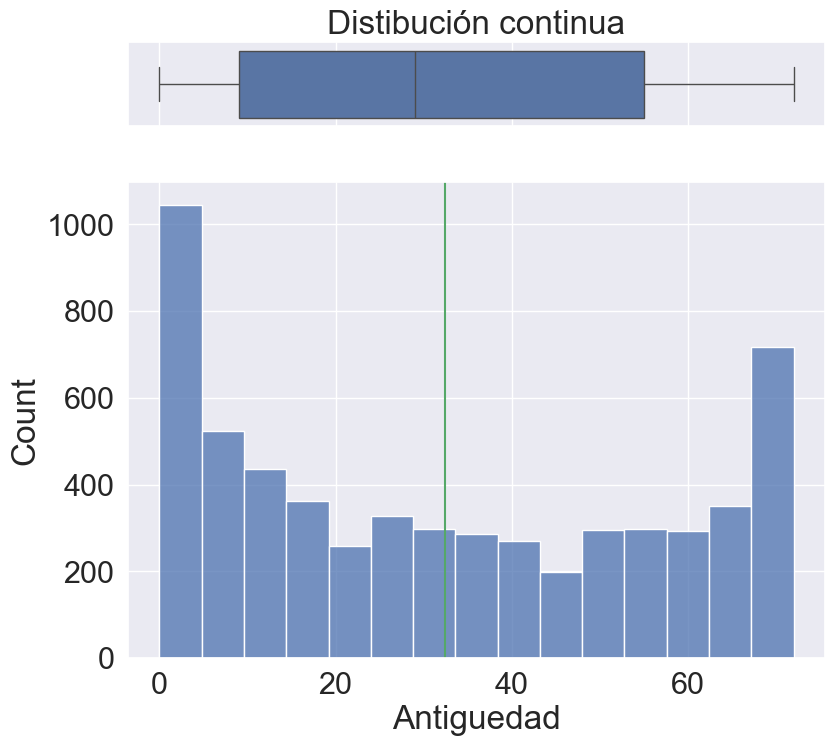

Cat


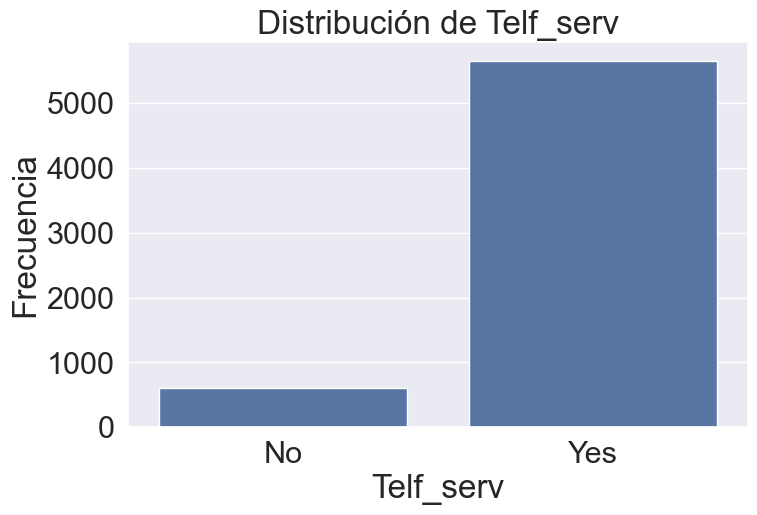

Cat


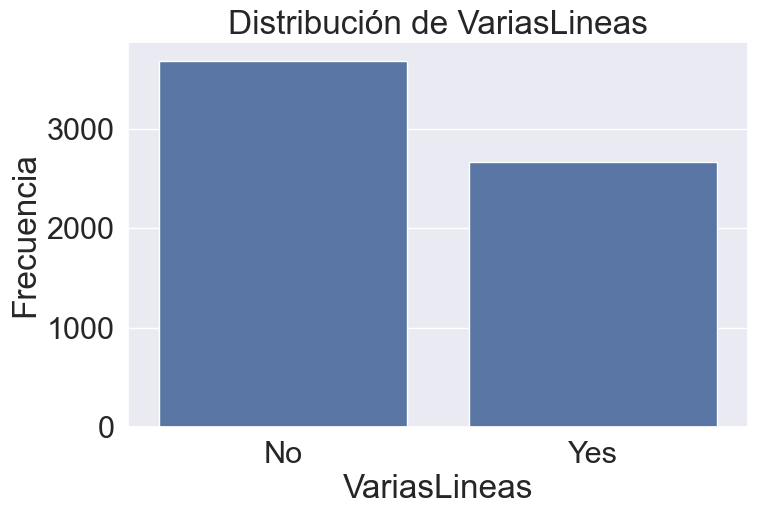

Cat


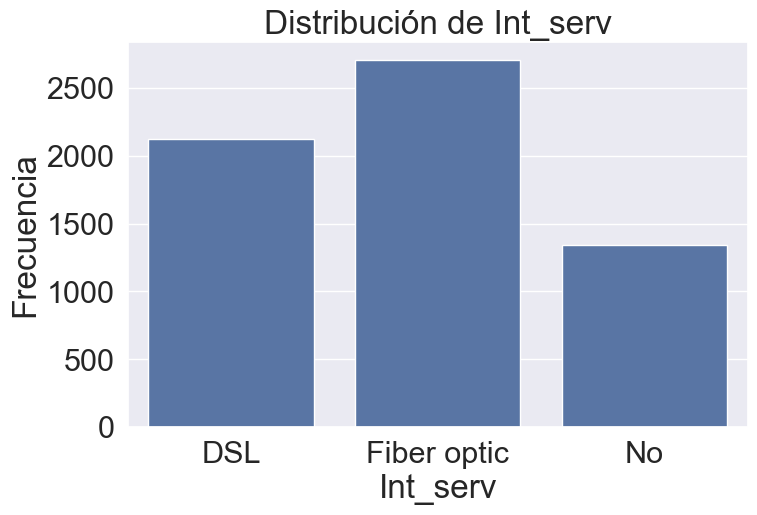

Cat


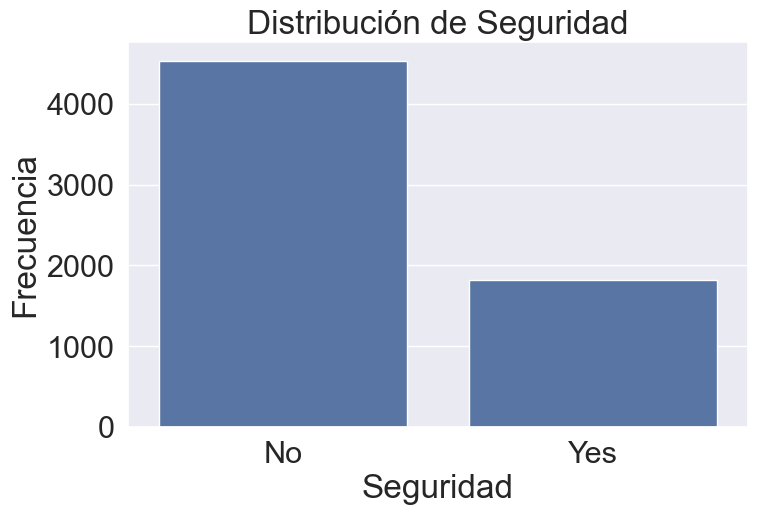

Cat


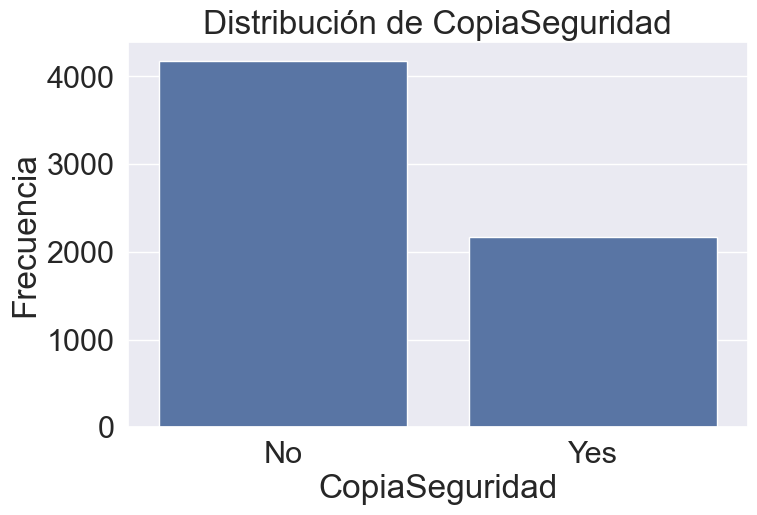

Cat


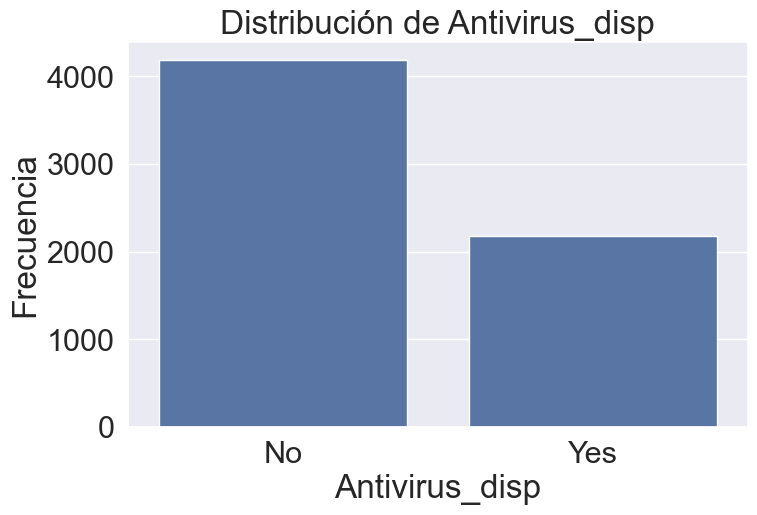

Cat


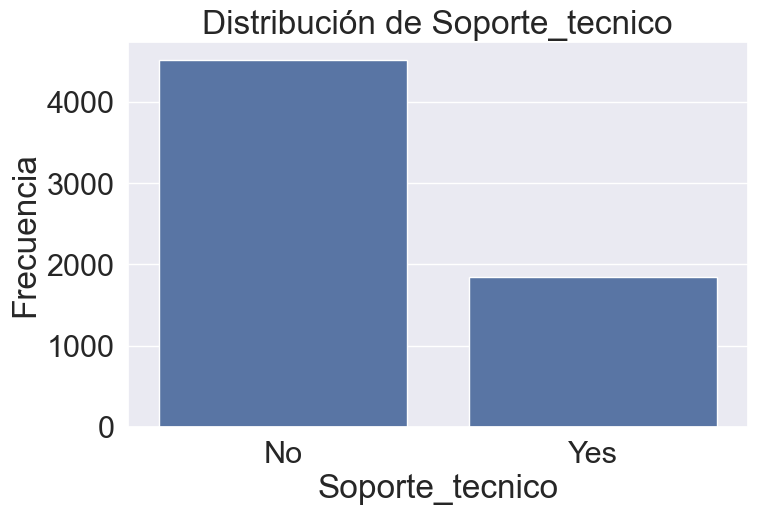

Cat


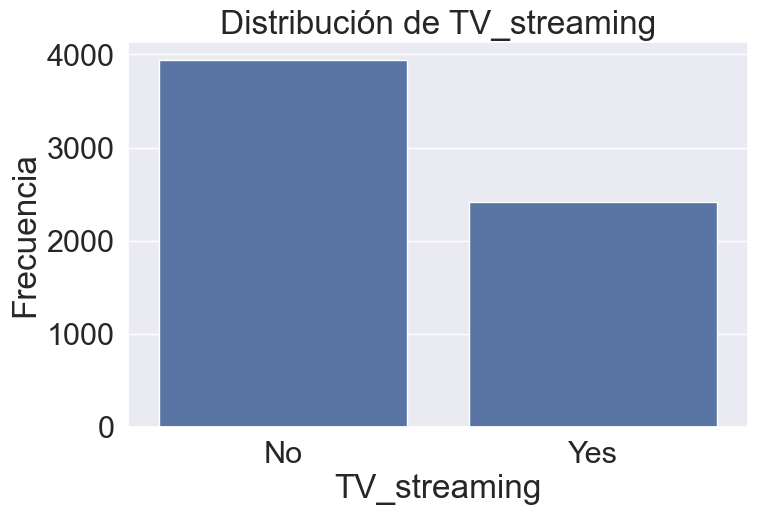

Cat


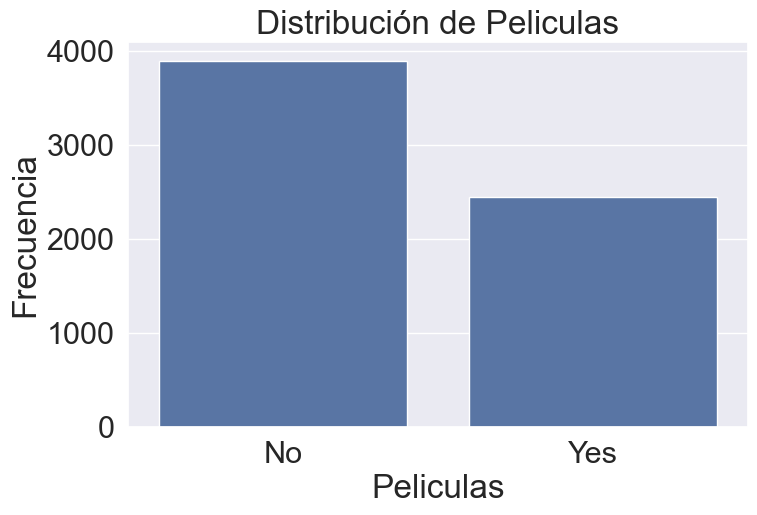

Cat


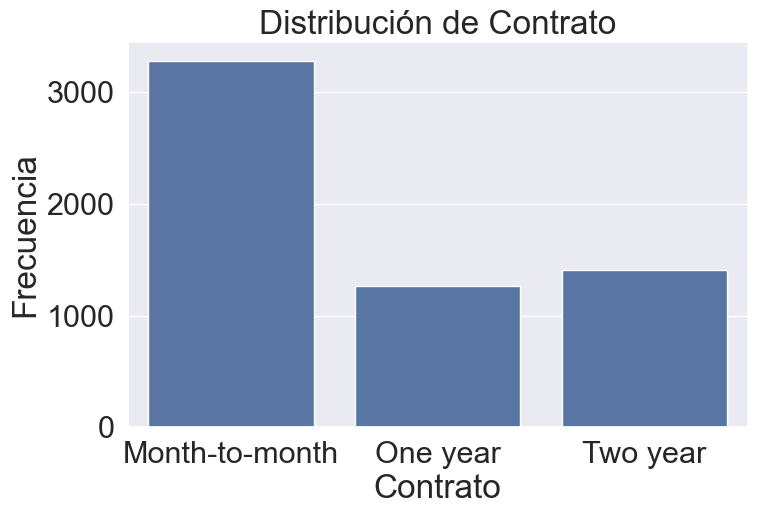

Cat


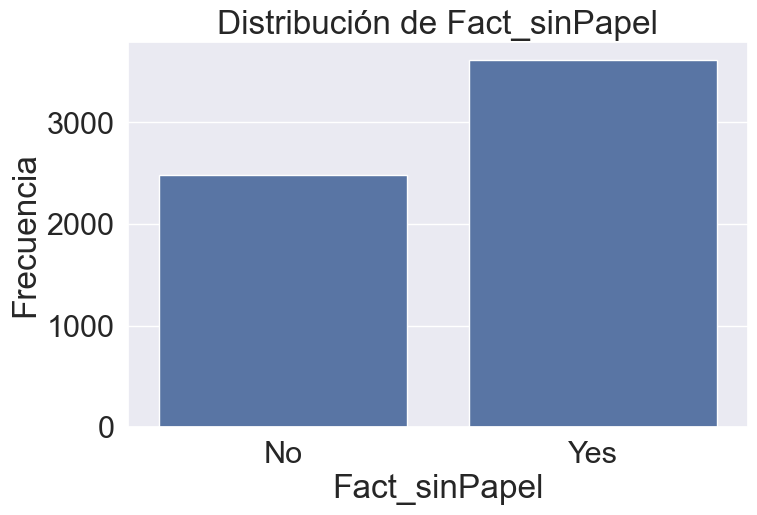

Cat


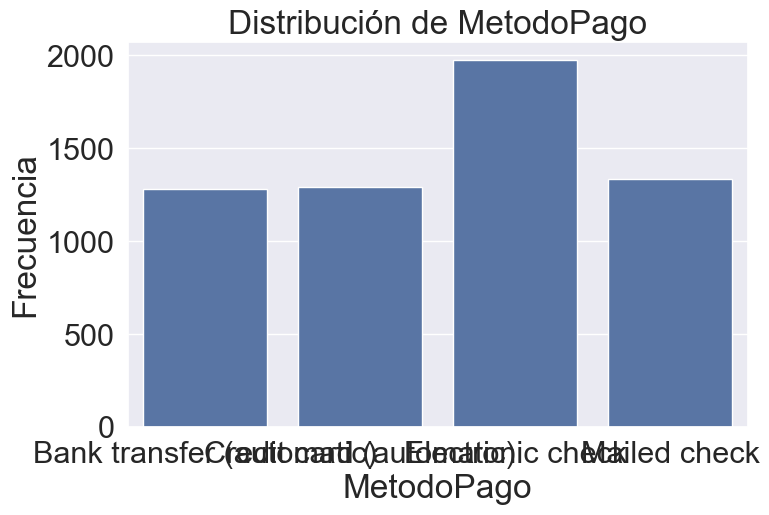

Cont


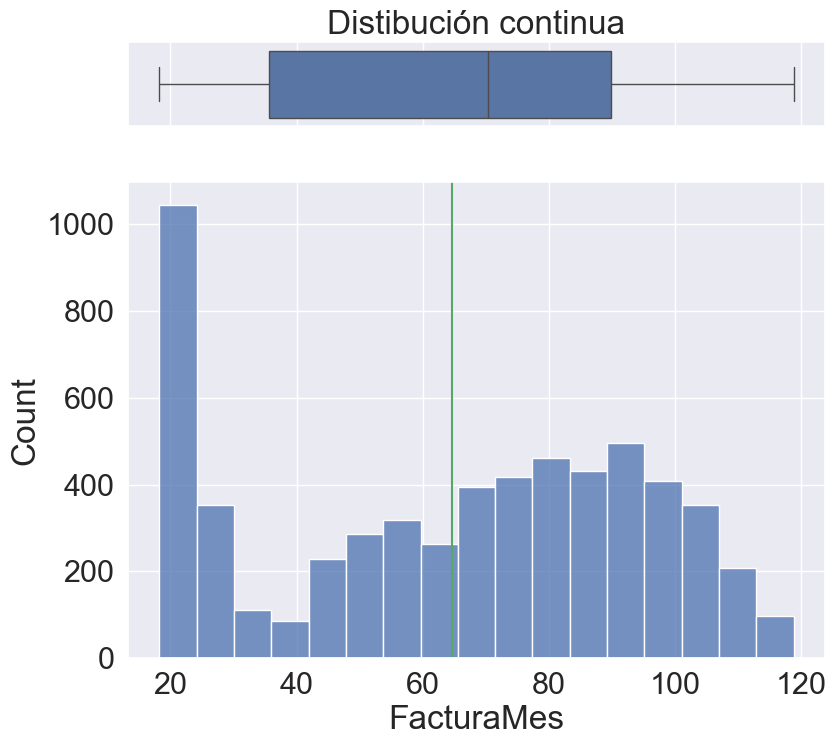

Cont


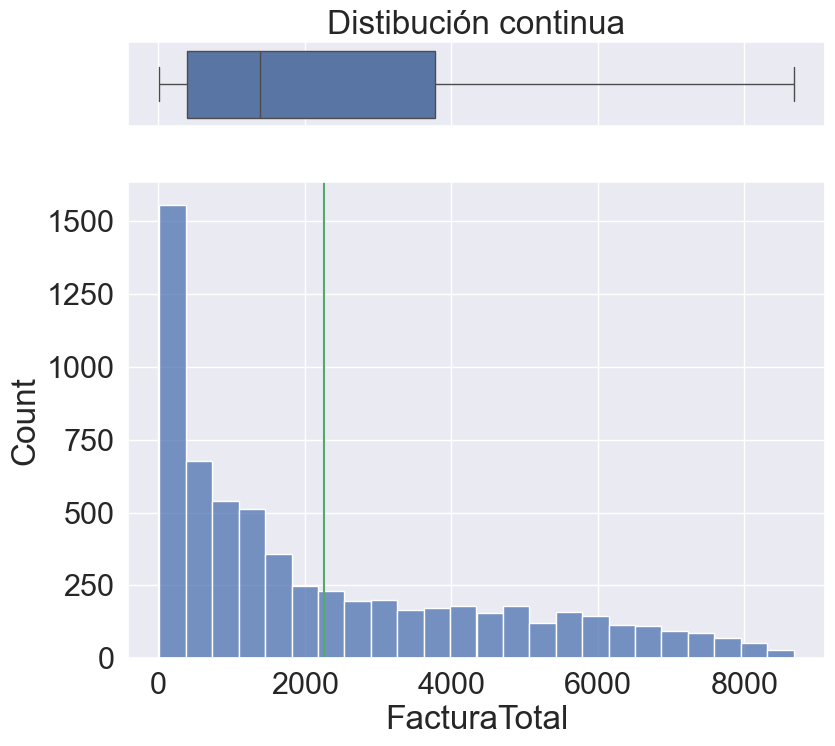

Cat


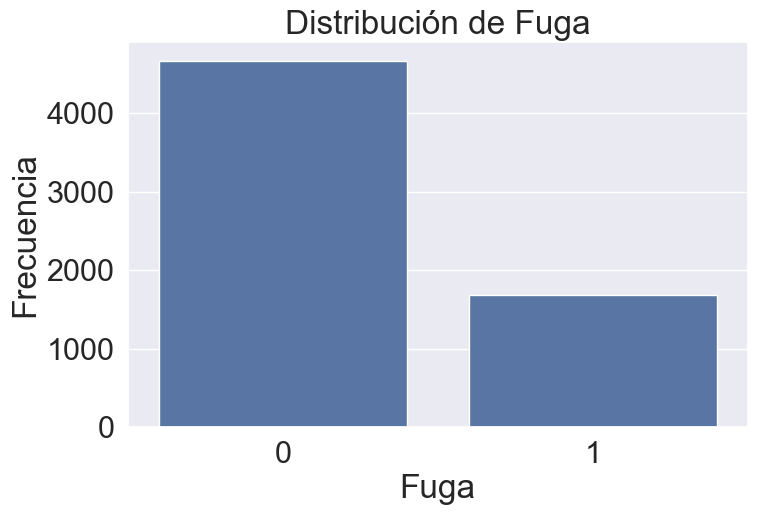

In [25]:
lista = ['Genero', 'Mayor65', 'Conyuge', 'PersCargo', 'Antiguedad', 'Telf_serv',
       'VariasLineas', 'Int_serv', 'Seguridad', 'CopiaSeguridad',
       'Antivirus_disp', 'Soporte_tecnico', 'TV_streaming', 'Peliculas',
       'Contrato', 'Fact_sinPapel', 'MetodoPago', 'FacturaMes', 'FacturaTotal',
       'Fuga']

for eachelement in lista:
    plot(fuga[eachelement])

In [26]:
fuga[fuga['FacturaTotal'] < 19]

Genero Mayor65 Conyuge PersCargo  Antiguedad Telf_serv VariasLineas  \
1045  Female     0.0      No        No         1.0       Yes           No   
1495    Male     0.0     Yes       Yes         1.0       Yes           No   
4459    Male     0.0      No        No         1.0       Yes           No   
5858    Male     0.0      No        No         1.0       Yes           No   

     Int_serv Seguridad CopiaSeguridad Antivirus_disp Soporte_tecnico  \
1045       No        No             No             No              No   
1495       No        No             No             No              No   
4459       No        No             No             No              No   
5858       No        No             No             No              No   

     TV_streaming Peliculas        Contrato Fact_sinPapel    MetodoPago  \
1045           No        No  Month-to-month            No           NaN   
1495           No        No        One year            No  Mailed check   
4459           No        No  Month-to-month            No           NaN   
5858           No        No  Month-to-month           Yes  Mailed check   

      FacturaMes  FacturaTotal Fuga  
1045       18.85         18.85    0  
1495       18.80         18.80    0  
4459       18.90         18.90    0  
5858       18.85         18.85    1

In [27]:

fuga[fuga['Antiguedad'] == 0]
#cuando antiguedad = 0, factura mes tiene un valor, factura total = nan
#~fuga[fuga['FacturaTotal'] < 19] NO tienen Antig_edad == 0, sino Antig_edad == 1
#Por tanto, tiene ya pasado el año, y su Factura del mes == FacturaTotal


Genero Mayor65 Conyuge PersCargo  Antiguedad Telf_serv VariasLineas  \
440   Female     0.0     Yes       Yes         0.0        No           No   
682     Male     0.0      No       Yes         0.0       Yes           No   
852   Female     0.0     Yes       Yes         0.0       Yes           No   
982     Male     0.0     Yes       Yes         0.0       Yes          Yes   
1211  Female     0.0     Yes       Yes         0.0        No           No   
3004    Male     NaN     Yes       Yes         0.0       Yes           No   
3954  Female     0.0     Yes       Yes         0.0       Yes           No   
4712    Male     0.0     Yes       Yes         0.0       Yes           No   
6022  Female     0.0     Yes       Yes         0.0       Yes          Yes   
6094    Male     0.0      No       Yes         0.0       Yes          Yes   

     Int_serv Seguridad CopiaSeguridad Antivirus_disp Soporte_tecnico  \
440       DSL       Yes             No            Yes             Yes   
682        No        No             No             No              No   
852       DSL       Yes            Yes            Yes              No   
982        No        No             No             No              No   
1211      DSL       Yes            Yes            Yes             Yes   
3004       No        No             No             No              No   
3954       No        No             No             No              No   
4712       No        No             No             No              No   
6022      DSL        No            Yes            Yes             Yes   
6094      DSL       Yes            Yes             No             Yes   

     TV_streaming Peliculas  Contrato Fact_sinPapel  \
440           Yes        No  Two year           Yes   
682            No        No  Two year            No   
852           Yes       Yes  Two year            No   
982            No        No  Two year            No   
1211          Yes        No  Two year            No   
3004           No        No  Two year            No   
3954           No        No  Two year            No   
4712           No        No       NaN           Yes   
6022          Yes        No  Two year            No   
6094           No        No  Two year           Yes   

                     MetodoPago  FacturaMes  FacturaTotal Fuga  
440   Bank transfer (automatic)       52.55           NaN    0  
682                Mailed check       20.25           NaN    0  
852                Mailed check       80.85           NaN    0  
982                Mailed check       25.75           NaN    0  
1211    Credit card (automatic)       56.05           NaN    0  
3004               Mailed check       19.85           NaN    0  
3954               Mailed check       20.00           NaN    0  
4712               Mailed check       19.70           NaN    0  
6022               Mailed check       73.35           NaN    0  
6094  Bank transfer (automatic)       61.90           NaN    0

In [29]:
fuga.describe()

Antiguedad   FacturaMes  FacturaTotal
count  5959.000000  5959.000000   6342.000000
mean     32.380769    64.678369   2268.727152
std      24.540411    30.013422   2258.843022
min       0.000000    18.250000     18.800000
25%       9.000000    35.550000    394.475000
50%      29.000000    70.300000   1384.175000
75%      55.000000    89.800000   3781.512500
max      72.000000   118.750000   8672.450000

In [30]:


pd.crosstab(index=fuga['Fuga'], columns=fuga['Antiguedad'])

Antiguedad  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  \
Fuga                                                                    ...   
0             10   193    96    91    74    58    54    69    68    62  ...   
1              0   316   112    80    73    49    38    48    35    43  ...   

Antiguedad  63.0  64.0  65.0  66.0  67.0  68.0  69.0  70.0  71.0  72.0  
Fuga                                                                    
0             58    63    56    64    78    80    77    87   145   296  
1              3     4     8     9     8     7     8    11     4     3  

[2 rows x 73 columns]

In [31]:
fuga[(fuga['Antiguedad'] == 10) & (fuga['Fuga'] == 1)].count()
#1 - 34
fuga[(fuga['Antiguedad'] == 10) & (fuga['Fuga'] == 0)].count()
#0 - 63
#pensaba q podia ser un error de 1 a 10 y por ende la proporción es al contrario en esa fila
#pero los datos de antiguedad 10 encajan con el resto, asi que quizas no
#mantendremos los datos sin cambios en esta parte

Genero             60
Mayor65            62
Conyuge            63
PersCargo          63
Antiguedad         63
Telf_serv          61
VariasLineas       63
Int_serv           61
Seguridad          63
CopiaSeguridad     63
Antivirus_disp     63
Soporte_tecnico    63
TV_streaming       63
Peliculas          63
Contrato           61
Fact_sinPapel      61
MetodoPago         56
FacturaMes         56
FacturaTotal       63
Fuga               63
dtype: int64

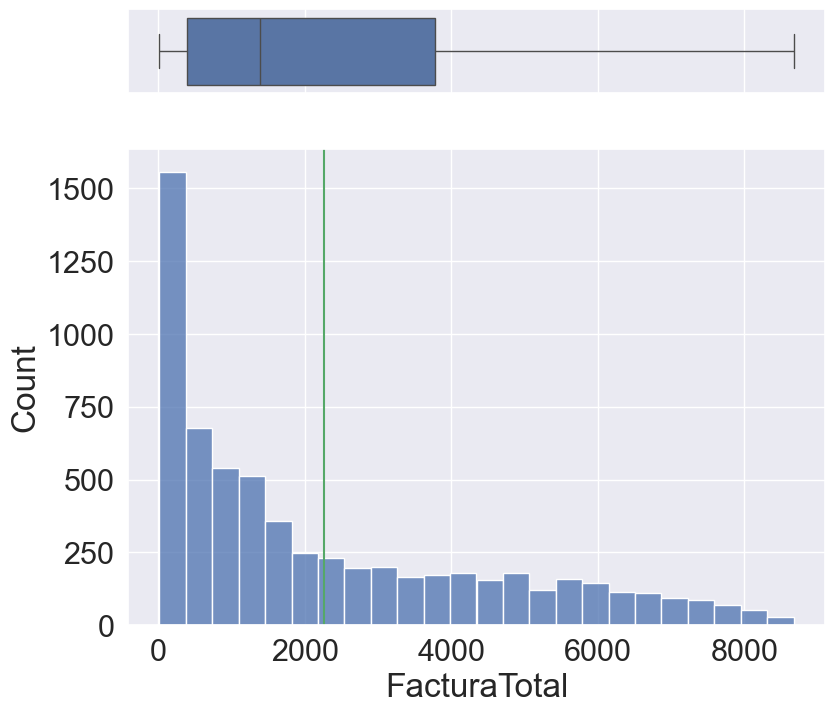

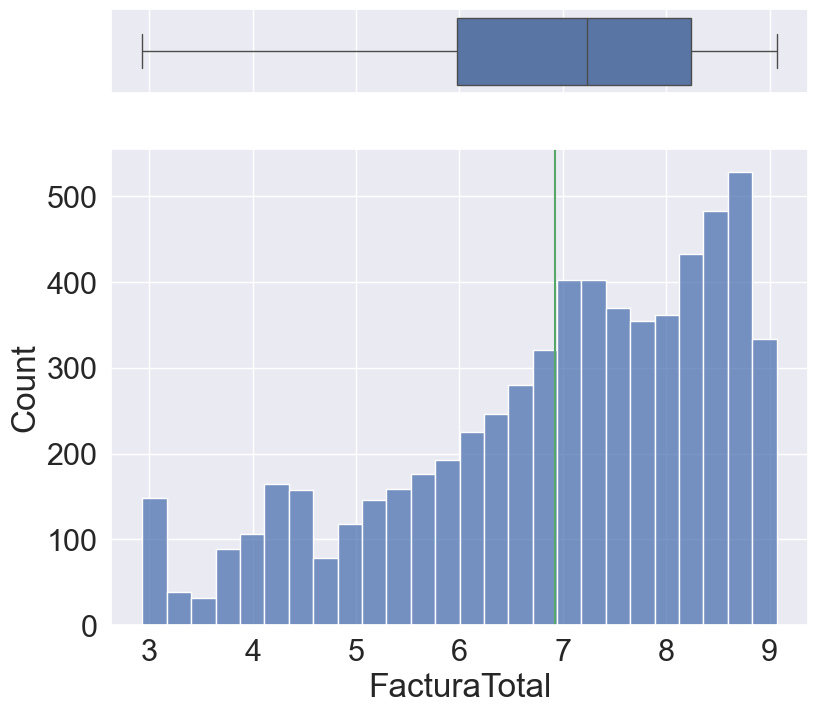

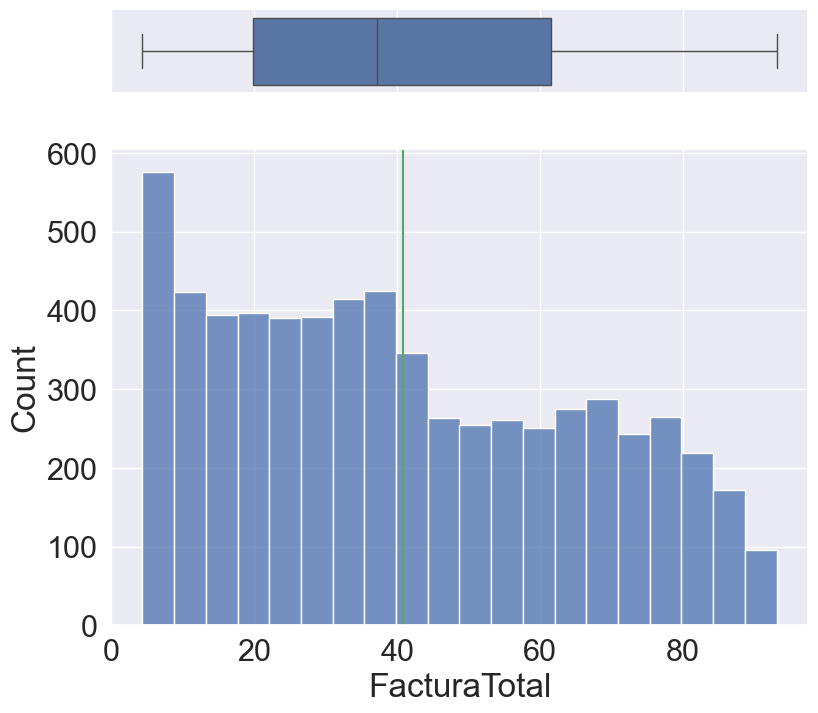

In [38]:
#viendo como cambia la distribución de los valores de factura total al transformarlos con raiz cuadradada o lg: para que no tengan una distribución tan asimetrica
histogram_boxplot(fuga.FacturaTotal)

FacturaTotallog = np.log(fuga.FacturaTotal)
histogram_boxplot(FacturaTotallog)

FTR = np.sqrt(fuga.FacturaTotal)
fuga['FacturatotalRaiz'] = np.sqrt(fuga.FacturaTotal)
histogram_boxplot(FTR)


In [39]:
ftr_median=FTR.median()

ftr_mean = FTR.mean()
print(f'{ftr_median} and {ftr_mean}')
#medir asimetria

FTR.skew()
#se considera que tiene asimetría baja, asi que mantendremos esta variable con la transformacionales sqrt()

37.20450161317612 and 40.839641476119


0.3134727764637483

In [42]:
fuga.Contrato.value_counts()
#Pudiese agruparlo en dos grupos, pero la cantidad de valores por grupo me parece suficiente como para dejarlo dividio en 3

Contrato
Month-to-month    3285
Two year          1413
One year          1261
Name: count, dtype: int64

In [44]:
#Apartamos la variable objetivo, sacandola en una variable y sacandola de dataset
VarObj = fuga.Fuga
newfuga = fuga.drop(['Fuga'], axis=1)
newfuga

Genero Mayor65 Conyuge PersCargo  Antiguedad Telf_serv VariasLineas  \
0     Female     0.0     Yes        No         1.0        No           No   
1       Male     0.0      No        No        34.0       Yes           No   
2       Male     0.0      No        No         2.0       Yes           No   
3        NaN     0.0      No        No        45.0        No           No   
4     Female     0.0      No        No         NaN       Yes           No   
...      ...     ...     ...       ...         ...       ...          ...   
6348  Female     0.0      No        No        72.0       Yes           No   
6349    Male     0.0     Yes       Yes        24.0       Yes          Yes   
6350     NaN     0.0     Yes       Yes        72.0       Yes          Yes   
6351    Male     1.0     Yes        No         4.0       Yes          Yes   
6352    Male     0.0      No        No        66.0       Yes           No   

         Int_serv Seguridad CopiaSeguridad Antivirus_disp Soporte_tecnico  \
0             DSL        No            Yes             No              No   
1             DSL       Yes             No            Yes              No   
2             DSL       Yes            Yes             No              No   
3             DSL       Yes             No            Yes             Yes   
4     Fiber optic        No             No             No              No   
...           ...       ...            ...            ...             ...   
6348           No        No             No             No              No   
6349          DSL       Yes             No            Yes             Yes   
6350  Fiber optic        No            Yes            Yes              No   
6351  Fiber optic        No             No             No              No   
6352          NaN       Yes             No            Yes             Yes   

     TV_streaming Peliculas        Contrato Fact_sinPapel  \
0              No        No  Month-to-month           Yes   
1              No        No        One year            No   
2              No        No  Month-to-month           Yes   
3              No        No        One year            No   
4              No        No  Month-to-month           Yes   
...           ...       ...             ...           ...   
6348           No        No        Two year           Yes   
6349          Yes       Yes        One year           Yes   
6350          Yes       Yes        One year           Yes   
6351           No        No             NaN           Yes   
6352          Yes       Yes        Two year           Yes   

                     MetodoPago  FacturaMes  FacturaTotal  FacturatotalRaiz  
0                           NaN         NaN         29.85          5.463515  
1                  Mailed check         NaN       1889.50         43.468379  
2                  Mailed check       53.85        108.15         10.399519  
3                           NaN       42.30       1840.75         42.903963  
4              Electronic check       70.70        151.65         12.314625  
...                         ...         ...           ...               ...  
6348  Bank transfer (automatic)       21.15       1419.40         37.674925  
6349               Mailed check       84.80       1990.50         44.615020  
6350    Credit card (automatic)      103.20       7362.90         85.807342  
6351               Mailed check       74.40        306.60         17.509997  
6352  Bank transfer (automatic)      105.65       6844.50         82.731493  

[6353 rows x 20 columns]

In [46]:
#SEGUNDA PARTE: 
#VAMOS A REVISAR LOS VALORES ATIPICOS

In [48]:
newfuga.select_dtypes(include=np.number).skew()

Antiguedad          0.240505
FacturaMes         -0.219667
FacturaTotal        0.967912
FacturatotalRaiz    0.313473
dtype: float64

In [50]:
## Función manual de winsor con clip+quantile 
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

from scipy import stats # Añadimos en este punto para cargar la librería que ahora hace falta

## Función para gestionar outliers
def gestiona_outliers(col,clas = 'check'):
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>6 ## Cambio mad por median_abs_deviation!! 
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)


In [52]:
newfuga.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))#.set_index(['Low','up','Tot'])


Antiguedad
FacturaMes
FacturaTotal
FacturatotalRaiz


Antiguedad  FacturaMes  FacturaTotal  FacturatotalRaiz
0         0.0         0.0           0.0               0.0
1         0.0         0.0           0.0               0.0
2         0.0         0.0           0.0               0.0

In [54]:
#NO HAY OUTLIERS

In [56]:
#PARTE TRES:
#EVALUAR MISSINGS

In [58]:
#MISSING POR VARIABLE
newfuga.apply(lambda x: x.isna().sum()/newfuga.shape[0]*100)


Genero              5.540689
Mayor65             5.540689
Conyuge             0.000000
PersCargo           0.000000
Antiguedad          6.201794
Telf_serv           1.448135
VariasLineas        0.000000
Int_serv            2.990713
Seguridad           0.000000
CopiaSeguridad      0.000000
Antivirus_disp      0.000000
Soporte_tecnico     0.000000
TV_streaming        0.000000
Peliculas           0.000000
Contrato            6.201794
Fact_sinPapel       4.108295
MetodoPago          7.429561
FacturaMes          6.201794
FacturaTotal        0.173147
FacturatotalRaiz    0.173147
dtype: float64

In [60]:
#MISSING POR OBSERVACION
newfuga.apply(lambda x: x.isna().sum()/newfuga.shape[1]*100)


Genero              1760.0
Mayor65             1760.0
Conyuge                0.0
PersCargo              0.0
Antiguedad          1970.0
Telf_serv            460.0
VariasLineas           0.0
Int_serv             950.0
Seguridad              0.0
CopiaSeguridad         0.0
Antivirus_disp         0.0
Soporte_tecnico        0.0
TV_streaming           0.0
Peliculas              0.0
Contrato            1970.0
Fact_sinPapel       1305.0
MetodoPago          2360.0
FacturaMes          1970.0
FacturaTotal          55.0
FacturatotalRaiz      55.0
dtype: float64

In [62]:
#Proporción de missings por observación (como una nueva columna del dataset)
newfuga['prop_missings'] = newfuga.apply(lambda x: x.isna().sum(),axis=1)

# Valoramos distribución
newfuga.prop_missings.describe()

count    6353.000000
mean        0.460098
std         0.649323
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: prop_missings, dtype: float64

In [64]:
newfuga.sort_values(by='prop_missings', ascending=False).head()



Genero Mayor65 Conyuge PersCargo  Antiguedad Telf_serv VariasLineas  \
3447    Male     NaN     Yes       Yes         NaN       Yes          Yes   
4712    Male     0.0     Yes       Yes         0.0       Yes           No   
1998  Female     NaN      No        No        28.0       Yes          Yes   
1446    Male     NaN      No        No         1.0       Yes          Yes   
3288     NaN     1.0     Yes        No        70.0       Yes           No   

     Int_serv Seguridad CopiaSeguridad  ... Soporte_tecnico TV_streaming  \
3447       No        No             No  ...              No           No   
4712       No        No             No  ...              No           No   
1998      NaN        No            Yes  ...              No           No   
1446      NaN        No             No  ...              No          Yes   
3288       No        No             No  ...              No           No   

     Peliculas        Contrato Fact_sinPapel               MetodoPago  \
3447        No        Two year            No             Mailed check   
4712        No             NaN           Yes             Mailed check   
1998       Yes  Month-to-month           Yes                      NaN   
1446        No             NaN           Yes         Electronic check   
3288        No             NaN           NaN  Credit card (automatic)   

     FacturaMes  FacturaTotal  FacturatotalRaiz  prop_missings  
3447      25.35           NaN               NaN              4  
4712      19.70           NaN               NaN              3  
1998      89.95       2625.55         51.240121              3  
1446      88.80         88.80          9.423375              3  
3288      19.55       1462.05         38.236762              3  

[5 rows x 21 columns]

<Axes: >

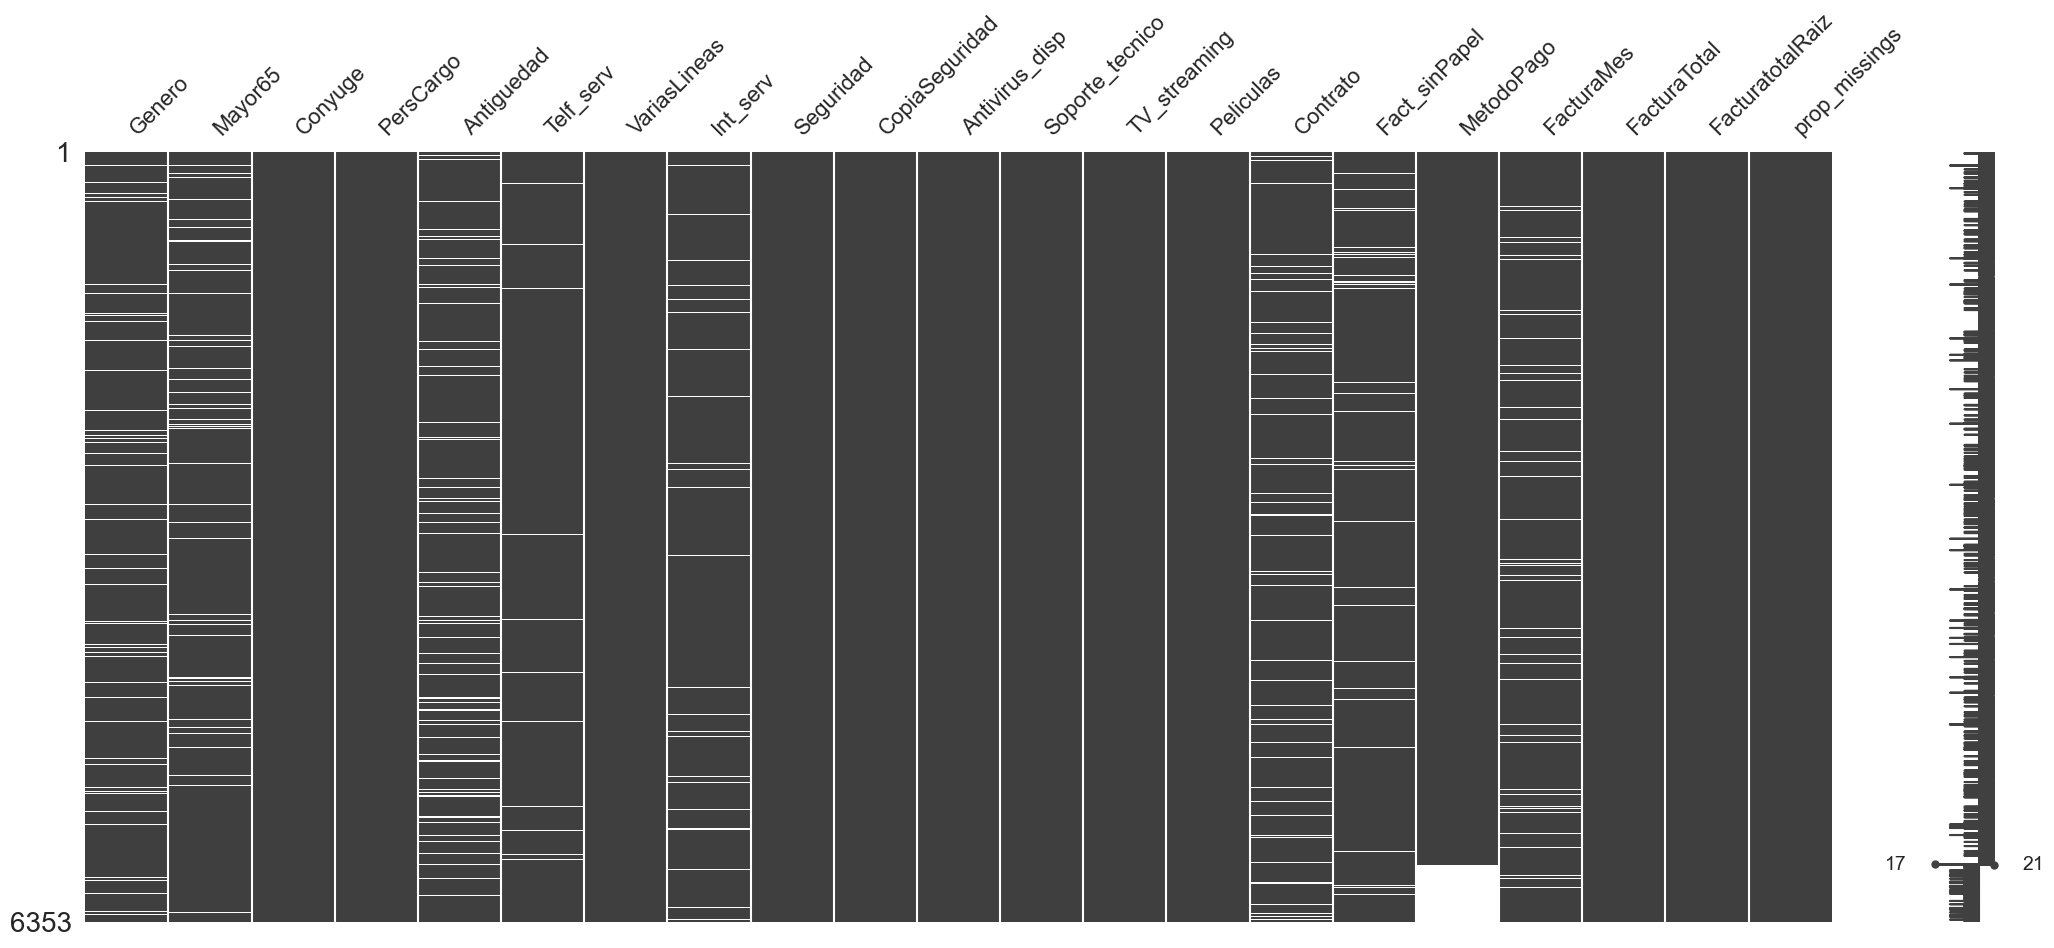

In [66]:
#VER PATRONES DE MISSINGS ENTRE VARIABLES

#no hay patrones de missings con otras variables


#conda config --add channels conda-forge
#conda install missingno
# pip install missingno
import missingno as msno   

# Plot correlation heatmap of missingness
msno.matrix(newfuga.sort_values(by='MetodoPago'))

<Axes: >

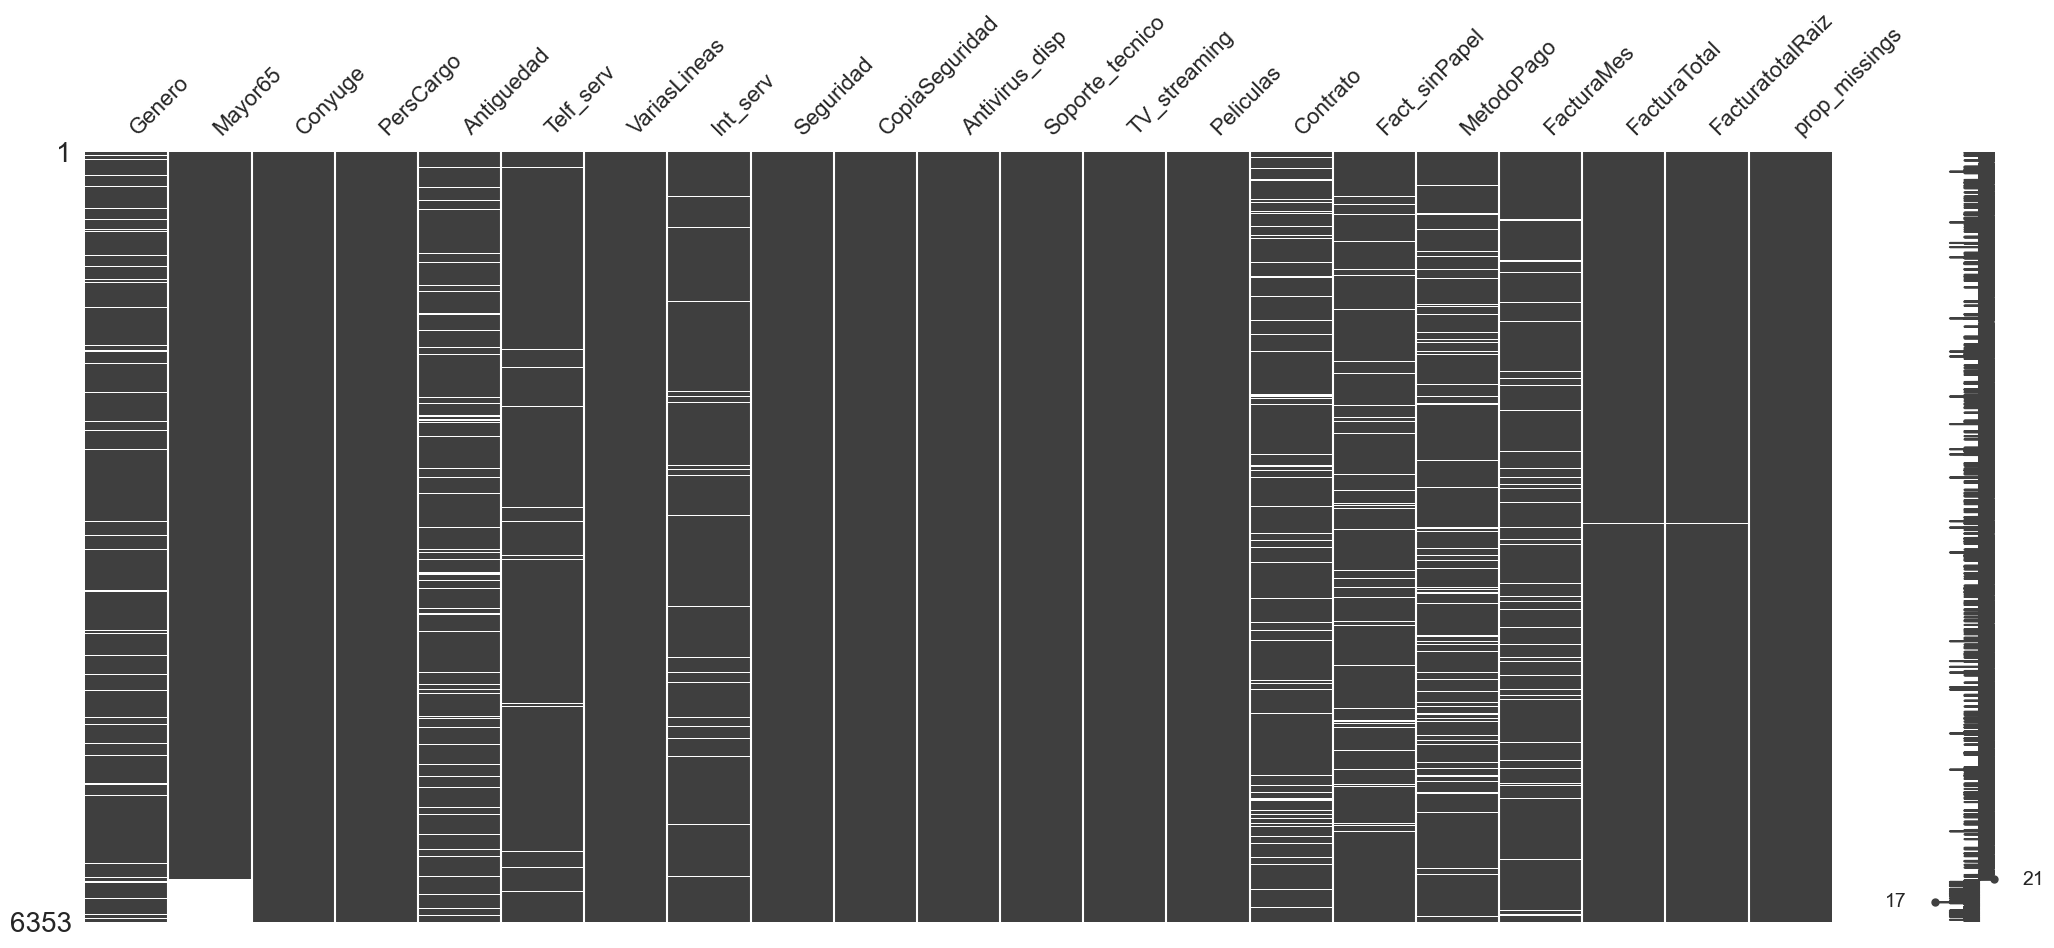

In [67]:
msno.matrix(newfuga.sort_values(by='Mayor65'))

<Axes: >

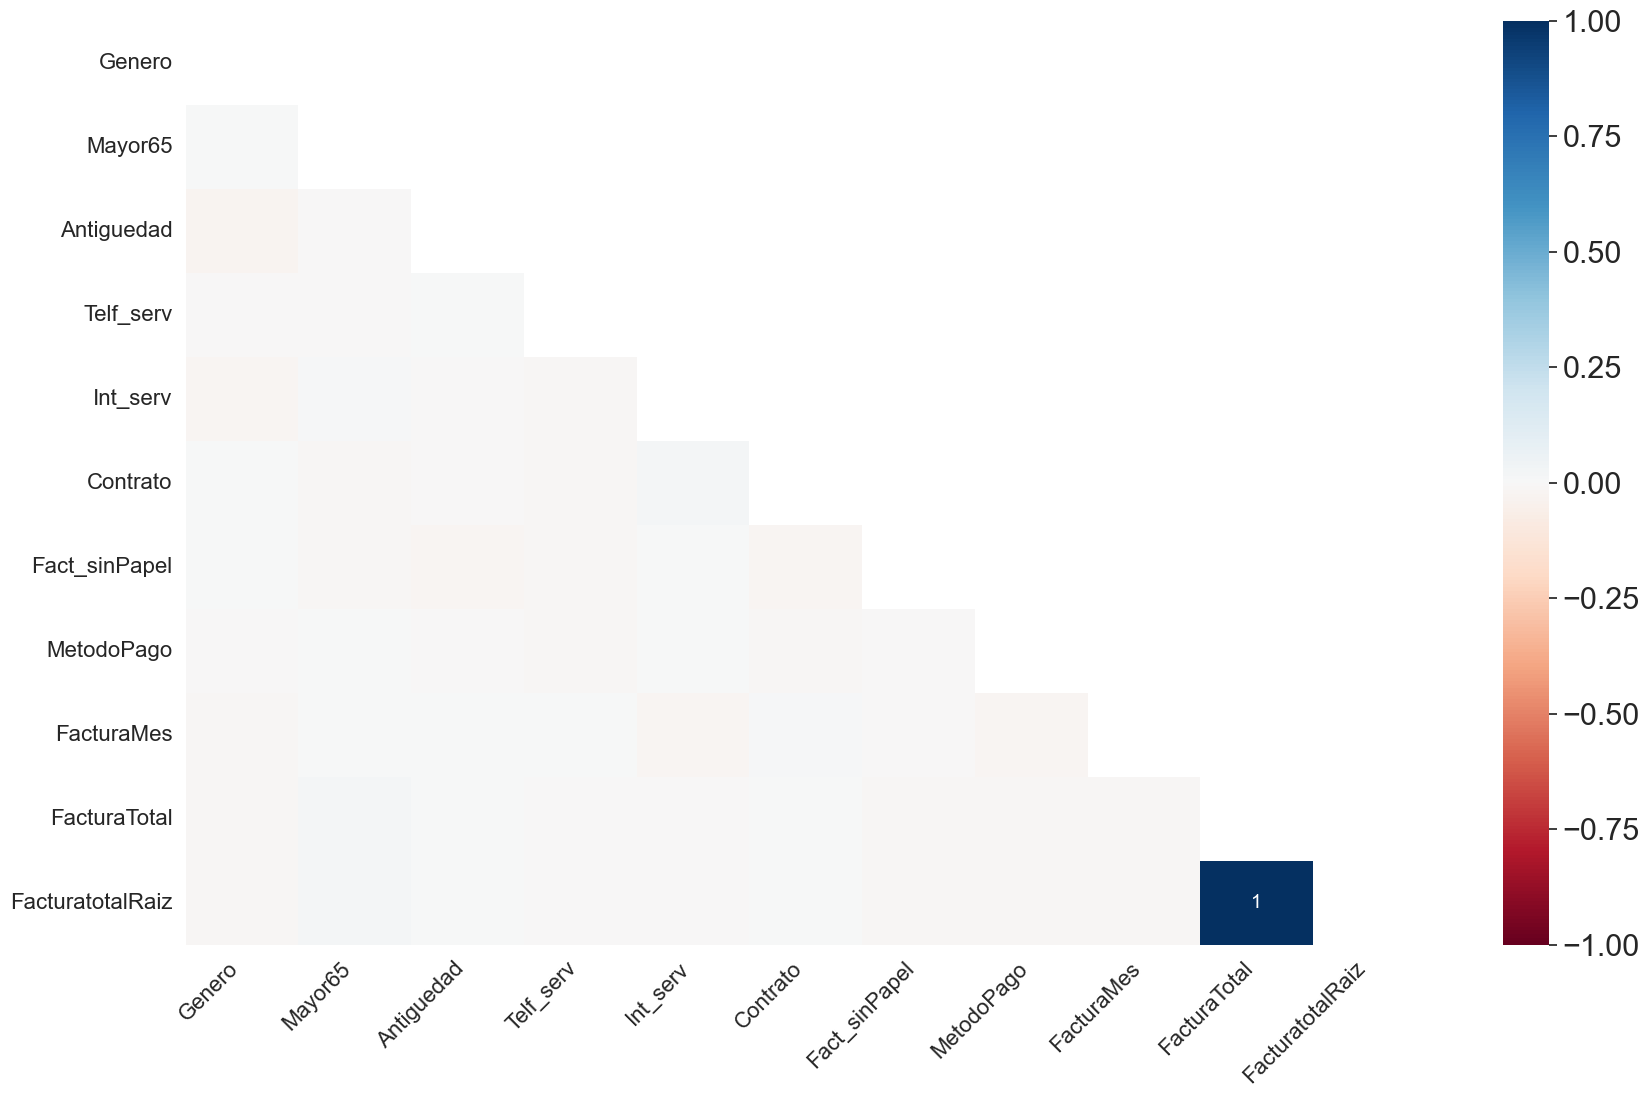

In [69]:
msno.heatmap(newfuga)


In [71]:
#IMPUTACIONES DE MISSINGS

In [74]:
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer

# Moda: Solo nominales
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# knn: Solo numéricas
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)

# Chain equations: solo numéricas
imputer_itImp = skl_imp.IterativeImputer(max_iter=50, random_state=0)

#!pip install feature_engine
import feature_engine.imputation as fe_imp

# Aleatoria: numéricas y nominales
imputer_rand = fe_imp.RandomSampleImputer()

# Mediana: solo numéricas
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')

# Media: solo numericas
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')


In [75]:
#DIVISION DE DATASET EN VARIABLES CONTINUAS Y CATEGORICAS

In [76]:
fugacat = newfuga.select_dtypes(exclude=np.number)

fuganum = newfuga.select_dtypes(include=np.number)



In [80]:
#TRATAMIENTO DE NUMERICAS

In [82]:
fugacat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Genero           6001 non-null   category
 1   Mayor65          6001 non-null   category
 2   Conyuge          6353 non-null   category
 3   PersCargo        6353 non-null   category
 4   Telf_serv        6261 non-null   category
 5   VariasLineas     6353 non-null   category
 6   Int_serv         6163 non-null   category
 7   Seguridad        6353 non-null   category
 8   CopiaSeguridad   6353 non-null   category
 9   Antivirus_disp   6353 non-null   category
 10  Soporte_tecnico  6353 non-null   category
 11  TV_streaming     6353 non-null   category
 12  Peliculas        6353 non-null   category
 13  Contrato         5959 non-null   category
 14  Fact_sinPapel    6092 non-null   category
 15  MetodoPago       5881 non-null   category
dtypes: category(16)
memory usage: 101.4 KB


In [84]:
fuganum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Antiguedad        5959 non-null   float64
 1   FacturaMes        5959 non-null   float64
 2   FacturaTotal      6342 non-null   float64
 3   FacturatotalRaiz  6342 non-null   float64
 4   prop_missings     6353 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.3 KB


In [86]:
#IMPUTACION POR LA MEDIANA

fuga_median = imputer_median.fit(fuganum).transform(fuganum)
print(fuga_median.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Antiguedad        6353 non-null   float64
 1   FacturaMes        6353 non-null   float64
 2   FacturaTotal      6353 non-null   float64
 3   FacturatotalRaiz  6353 non-null   float64
 4   prop_missings     6353 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.3 KB
None


In [88]:
#IMPUTACION POR LA MEDIA

fuga_mean = imputer_mean.fit(fuganum).transform(fuganum)
print(fuga_mean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Antiguedad        6353 non-null   float64
 1   FacturaMes        6353 non-null   float64
 2   FacturaTotal      6353 non-null   float64
 3   FacturatotalRaiz  6353 non-null   float64
 4   prop_missings     6353 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.3 KB
None


In [90]:
#IMPUTACION MULTIVARIANTE

In [92]:
imputer_knn.fit_transform(fuganum)

array([[1.00000000e+00, 2.53166667e+01, 2.98500000e+01, 5.46351535e+00,
        2.00000000e+00],
       [3.40000000e+01, 5.24333333e+01, 1.88950000e+03, 4.34683793e+01,
        1.00000000e+00],
       [2.00000000e+00, 5.38500000e+01, 1.08150000e+02, 1.03995192e+01,
        0.00000000e+00],
       ...,
       [7.20000000e+01, 1.03200000e+02, 7.36290000e+03, 8.58073423e+01,
        1.00000000e+00],
       [4.00000000e+00, 7.44000000e+01, 3.06600000e+02, 1.75099971e+01,
        1.00000000e+00],
       [6.60000000e+01, 1.05650000e+02, 6.84450000e+03, 8.27314934e+01,
        1.00000000e+00]])

In [93]:
# Fit/transform
fuganum_knn = pd.DataFrame(imputer_knn.fit_transform(fuganum),columns=fuganum.columns)
#fuganum_itImp = pd.DataFrame(imputer_itImp.fit_transform(fuganum),columns=fuganum.columns)


In [95]:
fuganum_itImp = pd.DataFrame(imputer_itImp.fit_transform(fuganum),columns=fuganum.columns)


In [96]:
fuganum_itImp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Antiguedad        6353 non-null   float64
 1   FacturaMes        6353 non-null   float64
 2   FacturaTotal      6353 non-null   float64
 3   FacturatotalRaiz  6353 non-null   float64
 4   prop_missings     6353 non-null   float64
dtypes: float64(5)
memory usage: 248.3 KB


In [98]:
#IMPUTACIONES PARA NOMINALES:

In [99]:
#IMPUTACION CON LA MODA 

fugacat_moda = pd.DataFrame(imputer_moda.fit_transform(fugacat), columns=fugacat.columns)
fugacat_moda = fugacat_moda.astype('category')
fugacat_moda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Genero           6353 non-null   category
 1   Mayor65          6353 non-null   category
 2   Conyuge          6353 non-null   category
 3   PersCargo        6353 non-null   category
 4   Telf_serv        6353 non-null   category
 5   VariasLineas     6353 non-null   category
 6   Int_serv         6353 non-null   category
 7   Seguridad        6353 non-null   category
 8   CopiaSeguridad   6353 non-null   category
 9   Antivirus_disp   6353 non-null   category
 10  Soporte_tecnico  6353 non-null   category
 11  TV_streaming     6353 non-null   category
 12  Peliculas        6353 non-null   category
 13  Contrato         6353 non-null   category
 14  Fact_sinPapel    6353 non-null   category
 15  MetodoPago       6353 non-null   category
dtypes: category(16)
memory usage: 101.4 KB


In [104]:
fugamedian = pd.concat([fuga_median, fugacat_moda, VarObj], axis=1)

fugamean = pd.concat([fuga_mean, fugacat_moda, VarObj], axis=1)

fugaknn = pd.concat([fuganum_knn ,fugacat_moda, VarObj],axis=1)

fugaitImp = pd.concat([fuganum_itImp ,fugacat_moda, VarObj],axis=1)

In [106]:
fugamedian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Antiguedad        6353 non-null   float64 
 1   FacturaMes        6353 non-null   float64 
 2   FacturaTotal      6353 non-null   float64 
 3   FacturatotalRaiz  6353 non-null   float64 
 4   prop_missings     6353 non-null   int64   
 5   Genero            6353 non-null   category
 6   Mayor65           6353 non-null   category
 7   Conyuge           6353 non-null   category
 8   PersCargo         6353 non-null   category
 9   Telf_serv         6353 non-null   category
 10  VariasLineas      6353 non-null   category
 11  Int_serv          6353 non-null   category
 12  Seguridad         6353 non-null   category
 13  CopiaSeguridad    6353 non-null   category
 14  Antivirus_disp    6353 non-null   category
 15  Soporte_tecnico   6353 non-null   category
 16  TV_streaming      6353 n

In [109]:
#ALEATORIA PARA TODAS LAS VARIABLES: NUMERICAS Y CATEGORIAS

In [111]:
fugarandom = pd.DataFrame(imputer_rand.fit_transform(newfuga), columns=newfuga.columns)
fugarandom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Genero            6353 non-null   category
 1   Mayor65           6353 non-null   category
 2   Conyuge           6353 non-null   category
 3   PersCargo         6353 non-null   category
 4   Antiguedad        6353 non-null   float64 
 5   Telf_serv         6353 non-null   category
 6   VariasLineas      6353 non-null   category
 7   Int_serv          6353 non-null   category
 8   Seguridad         6353 non-null   category
 9   CopiaSeguridad    6353 non-null   category
 10  Antivirus_disp    6353 non-null   category
 11  Soporte_tecnico   6353 non-null   category
 12  TV_streaming      6353 non-null   category
 13  Peliculas         6353 non-null   category
 14  Contrato          6353 non-null   category
 15  Fact_sinPapel     6353 non-null   category
 16  MetodoPago        6353 n

In [123]:
# Agregar variables objetivo al input random
fugarandom_final=pd.concat([fugarandom, VarObj],axis=1)
fugarandom_final.info()
fugarandom_2 = fugarandom.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Genero            6353 non-null   category
 1   Mayor65           6353 non-null   category
 2   Conyuge           6353 non-null   category
 3   PersCargo         6353 non-null   category
 4   Antiguedad        6353 non-null   float64 
 5   Telf_serv         6353 non-null   category
 6   VariasLineas      6353 non-null   category
 7   Int_serv          6353 non-null   category
 8   Seguridad         6353 non-null   category
 9   CopiaSeguridad    6353 non-null   category
 10  Antivirus_disp    6353 non-null   category
 11  Soporte_tecnico   6353 non-null   category
 12  TV_streaming      6353 non-null   category
 13  Peliculas         6353 non-null   category
 14  Contrato          6353 non-null   category
 15  Fact_sinPapel     6353 non-null   category
 16  MetodoPago        6353 n

In [115]:
#GUARDAR ARCHIVOS FINALES:

In [117]:

#!pip install datasette-pytables
#!pip install tables

fugarandom_final.to_hdf('fugarandom_final.h5',key='df',format='table')

fugamedian.to_hdf('fugarandom_final.h5',key='df',format='table')

fugamean.to_hdf('fugamean.h5',key='df',format='table')

fugaknn.to_hdf('fugaknn.h5',key='df',format='table')

fugaitImp.to_hdf('fugaitImp.h5',key='df',format='table')

In [118]:
import ydata_profiling

ydata_profiling.ProfileReport(fuga)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [131]:
# http://gnpalencia.org/c/binning_continuous.html
#pip install optbinning
#tramificando la variable factura total 
from optbinning import ContinuousOptimalBinning

optb = ContinuousOptimalBinning(name='FacturaTotal', dtype="numerical", max_n_bins=4)
optb.fit(fugarandom['FacturaTotal'].values, VarObj)

random_tramif = optb.transform(fugarandom['FacturaTotal'].values, metric="bins")
print(random_tramif)

fugarandom['FactutaTotalTram'] = random_tramif

fugarandom_tramif=pd.concat([fugarandom, VarObj],axis=1)

fugarandom_tramif.to_hdf('fugarandomTram.h5',key='df',format='table')

['(-inf, 96.62)' '[198.05, 6287.27)' '[96.62, 198.05)' ...
 '[6287.27, inf)' '[198.05, 6287.27)' '[6287.27, inf)']


In [133]:
df = pd.read_hdf(r'/Users/gnerojas/Documents/Master/Minería de datos y modelización predictiva /PARTE I_Depuracion y Regresiones/Tarea/fugarandomTram.h5')

In [135]:
df

Genero Mayor65 Conyuge PersCargo  Antiguedad Telf_serv VariasLineas  \
0     Female     0.0     Yes        No         1.0        No           No   
1       Male     0.0      No        No        34.0       Yes           No   
2       Male     0.0      No        No         2.0       Yes           No   
3       Male     0.0      No        No        45.0        No           No   
4     Female     0.0      No        No        57.0       Yes           No   
...      ...     ...     ...       ...         ...       ...          ...   
6348  Female     0.0      No        No        72.0       Yes           No   
6349    Male     0.0     Yes       Yes        24.0       Yes          Yes   
6350  Female     0.0     Yes       Yes        72.0       Yes          Yes   
6351    Male     1.0     Yes        No         4.0       Yes          Yes   
6352    Male     0.0      No        No        66.0       Yes           No   

         Int_serv Seguridad CopiaSeguridad  ... Peliculas        Contrato  \
0             DSL        No            Yes  ...        No  Month-to-month   
1             DSL       Yes             No  ...        No        One year   
2             DSL       Yes            Yes  ...        No  Month-to-month   
3             DSL       Yes             No  ...        No        One year   
4     Fiber optic        No             No  ...        No  Month-to-month   
...           ...       ...            ...  ...       ...             ...   
6348           No        No             No  ...        No        Two year   
6349          DSL       Yes             No  ...       Yes        One year   
6350  Fiber optic        No            Yes  ...       Yes        One year   
6351  Fiber optic        No             No  ...        No  Month-to-month   
6352  Fiber optic       Yes             No  ...       Yes        Two year   

     Fact_sinPapel                 MetodoPago FacturaMes FacturaTotal  \
0              Yes               Mailed check      95.15        29.85   
1               No               Mailed check     114.05      1889.50   
2              Yes               Mailed check      53.85       108.15   
3               No  Bank transfer (automatic)      42.30      1840.75   
4              Yes           Electronic check      70.70       151.65   
...            ...                        ...        ...          ...   
6348           Yes  Bank transfer (automatic)      21.15      1419.40   
6349           Yes               Mailed check      84.80      1990.50   
6350           Yes    Credit card (automatic)     103.20      7362.90   
6351           Yes               Mailed check      74.40       306.60   
6352           Yes  Bank transfer (automatic)     105.65      6844.50   

     FacturatotalRaiz  prop_missings   FactutaTotalTram  Fuga  
0            5.463515              2      (-inf, 96.62)     0  
1           43.468379              1  [198.05, 6287.27)     0  
2           10.399519              0    [96.62, 198.05)     1  
3           42.903963              2  [198.05, 6287.27)     0  
4           12.314625              1    [96.62, 198.05)     1  
...               ...            ...                ...   ...  
6348        37.674925              0  [198.05, 6287.27)     0  
6349        44.615020              0  [198.05, 6287.27)     0  
6350        85.807342              1     [6287.27, inf)     0  
6351        17.509997              1  [198.05, 6287.27)     1  
6352        82.731493              1     [6287.27, inf)     0  

[6353 rows x 23 columns]

In [149]:
#PASAR A CSV

fugarandom_final.to_csv('fugarandom.csv', index=False)

fugamedian.to_csv('fugamedian.csv', index=False)

fugamean.to_csv('fugamean.csv', index=False)

fugaknn.to_csv('fugaknn.csv', index=False)

fugaitImp.to_csv('fugaitImp.csv', index=False)

fugarandom_tramif.to_csv('fugarandom_tramif.csv', index=False)